# 8. Optimization: Exercise Solutions

## 1. Try with you own function 
1) Define a function of your interest (with two or more inputs) to be minimized or maximized.  
It can be an explicit mathematical form, or given implictly as a result of simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fun(x, a=10):
    """sine in quardatic valley"""
    x = np.array(x)
    y = (x[0]**2+x[1]**2) + a*np.sin(x[0])
    return y

def fun_grad(x, a=10):
    """gradient of dips(x)"""
    df1 = 2*x[0] + a*np.cos(x[0])
    df2 = 2*x[1]
    return np.array([df1, df2])

2) Visualize the function, e.g., by surface plot or contour plot.

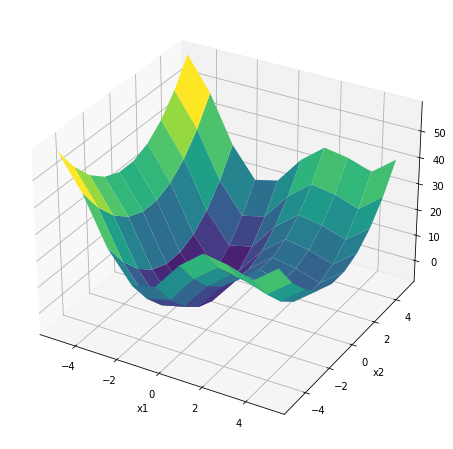

In [3]:
w = 5
N = 10
x = np.linspace(-w,w,N)
x1, x2 = np.meshgrid(x, x)
y = fun((x1, x2), 10)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')
plt.xlabel("x1"); plt.ylabel("x2"); 

3) Mixmize or minimize the function using two or more optimization algorithms, e.g.

* Gradient ascent/descent
* Newton-Raphson method
* Evolutionary algorithm
* scpy.optimize

and compare the results with different starting points and parameters. 

### Gradiend descent

In [4]:
def grad_descent(f, df, x0, eta=0.01, eps=1e-6, imax=1000):
    """Gradient descent"""
    xh = np.zeros((imax+1, len(np.ravel([x0]))))  # history
    xh[0] = x0
    f0 = f(x0)  # initialtization
    for i in range(imax):
        x1 = x0 - eta*df(x0)
        f1 = f(x1)
        # print(x1, f1)
        xh[i+1] = x1
        if(f1 <= f0 and f1 > f0 - eps):  # small decrease
            return(x1, f1, xh[:i+2])
        x0 = x1
        f0 = f1
    print("Failed to converge in ", imax, " iterations.")
    return(x1, f1, xh)

[-1.30644001  0.00485736] -7.945799781640874


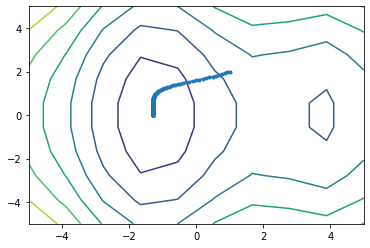

In [5]:
x0 = [1,2]
xmin, fmin, xhist = grad_descent(fun, fun_grad, x0, 0.01)
print(xmin, fmin)
plt.contour(x1, x2, y)
plt.plot(xhist[:,0], xhist[:,1], '.-');

[3.83746711 0.00485736] 8.31560917345187


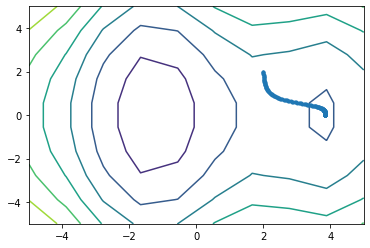

In [6]:
x0 = [2,2]
xmin, fmin, xhist = grad_descent(fun, fun_grad, x0, 0.01)
print(xmin, fmin)
plt.contour(x1, x2, y)
plt.plot(xhist[:,0], xhist[:,1], '.-');

### scipy.optimize

In [7]:
from scipy.optimize import minimize

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
[-1.30644001e+00  9.72344832e-09] -7.945823375615283


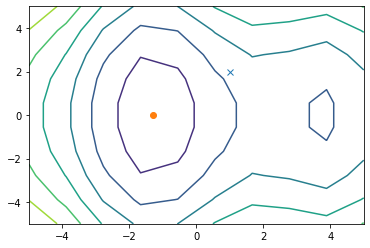

In [8]:
x0 = [1,2]
result = minimize(fun, x0, jac=fun_grad, options={'disp': True})
print( result.x, result.fun)
plt.contour(x1, x2, y)
plt.plot(x0[0], x0[1], 'x', result.x[0], result.x[1], 'o');

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
[ 3.83746711e+00 -9.70435929e-09] 8.315585579477458


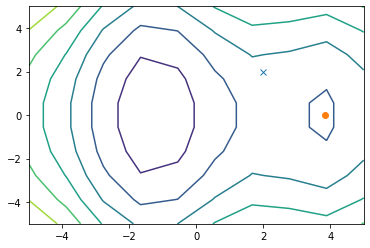

In [9]:
x0 = [2,2]
result = minimize(fun, x0, jac=fun_grad, options={'disp': True})
print( result.x, result.fun)
plt.contour(x1, x2, y)
plt.plot(x0[0], x0[1], 'x', result.x[0], result.x[1], 'o');

Option) Set equality or inequality constraints and apply an algorithm for constrained optimization.

In [10]:
# h(x) = x[0] - x[1] = 0
def h(x):
    return 2*x[0] - x[1] - 4
def h_grad(x):
    return np.array([2, -1])

With equality constraint $h(x)=0$.

Optimization terminated successfully    (Exit mode 0)
            Current function value: 13.081270258785018
            Iterations: 6
            Function evaluations: 7
            Gradient evaluations: 6
[2.13406394 0.26812787] 13.081270258785018


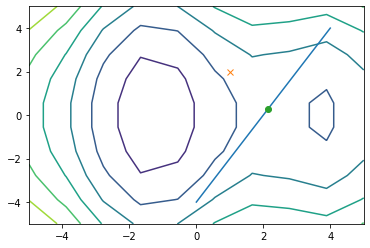

In [11]:
x0 = [1,2]
cons = ({'type':'eq', 'fun':h, 'jac':h_grad})
result = minimize(fun, [1,-3], jac=fun_grad,
            method='SLSQP', constraints=cons, options={'disp': True})
print( result.x, result.fun)
plt.contour(x1, x2, y)
plt.plot([0,4], [-4,4])  # h(x) = 0
plt.plot(x0[0], x0[1], 'x', result.x[0], result.x[1], 'o');

Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.31558557983486
            Iterations: 13
            Function evaluations: 21
            Gradient evaluations: 13
[3.83746046e+00 1.30908488e-05] 8.31558557983486


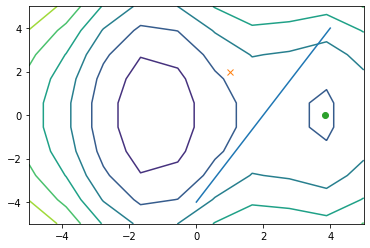

In [12]:
x0 = [1,2]
cons = ({'type':'ineq', 'fun':h, 'jac':h_grad})
result = minimize(fun, [1,-3], jac=fun_grad,
            method='SLSQP', constraints=cons, options={'disp': True})
print( result.x, result.fun)
plt.contour(x1, x2, y)
plt.plot([0,4], [-4,4])  # h(x) = 0
plt.plot(x0[0], x0[1], 'x', result.x[0], result.x[1], 'o');